## Analyze Errors

In [8]:
import pandas as pd
import seaborn as sns

In [9]:
# read error metrics
data = 'prison'
model ='arima'
file_name = f'{data}_{model}'
errors = pd.read_csv(f'../results/{file_name}_errors.csv', index_col=0)

In [10]:
errors.head()

,ts_name,forecast_type,error_metric,error,level
0,Aggregated,original,MASE,1.446769,1
1,Aggregated,adjusted,MASE,4.715379,1
2,Aggregated,original,SMAPE,1.326560,1
3,Aggregated,adjusted,SMAPE,4.432725,1
4,ACT,original,MASE,2.784355,2


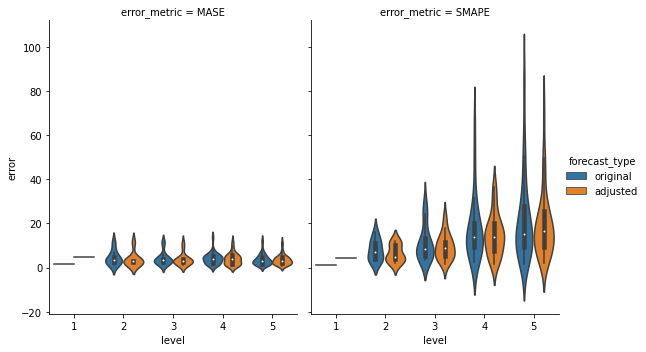

In [15]:
plot = sns.catplot(x="level", y="error", hue="forecast_type",
                col="error_metric", data=errors,
                height=5, aspect=.8, kind = 'violin')

In [21]:
mase = errors.loc[errors['error_metric'] == 'MASE']
mase.groupby(['forecast_type', 'level']).mean()

error
forecast_type level          
adjusted      1      4.715379
              2      3.731019
              3      3.731693
              4      3.938942
              5      3.542419
original      1      1.446769
              2      4.527525
              3      4.205627
              4      4.168226
              5      3.657573

In [22]:
smape = errors.loc[errors['error_metric'] == 'SMAPE']
smape.groupby(['forecast_type', 'level']).mean()

error
forecast_type level           
adjusted      1       4.432725
              2       6.555109
              3       9.551144
              4      14.965772
              5      19.593061
original      1       1.326560
              2       7.934406
              3      11.215443
              4      17.650349
              5      21.901368